#### Autor: Bernardo Salinas Jaquez
#### Fecha: 20-Diciembre-2020
#### Vecino par Cercano. Pacientes con cáncer de mama

### Objetivo
Aplicar el algoritmo de Vecino par Cercano para clasificar si un paciente tiene cáncer de mama o no de acuerdo a las características del tumor.

### Descripcíon
Se utilza mediante comandos e instrucciones de Python y un conjunto de datos de cáncer de mama que viene incluido en la librería sklearn el algoritmo de vecino par cercano para clasificar si un paciente que presenta un tumor con ciertas características puede llegar a ser un tumor benigno o maligno.

### Fundamento teórico

Los algoritmos de clasificación se usan cuando el resultado deseado es un valor discreto en otras palabras son útiles cuando la respuesta al problema cae dentro de un conjunto finito de resultados posibles.

Vecino par cercano o K vecinos más cercanos es uno de los algoritmos de clasificación más básicos y esenciales en Machine Learning. Pertenece al dominio del aprendizaje supervisado y encuentra una aplicación intensa en el reconocimiento de patrones, la minería de datos y la detección de intrusos. [Aprende IA, Desconocido]

El clasificador KNN, por sus siglas en inglés, es también un algoritmo de aprendizaje no paramétrico y basado en instancias:

* No paramétrico significa que no hace suposiciones explícitas sobre la forma funcional de los datos, evitando modelas mal la distribución subyacente de los datos. Por ejemplo, supongamos que nuestros datos son altamente no gaussianos, pero el modelo de Machine Learning que elegimos asume una forma gaussiana. En este caso, nuestro algoritmo haría predicciones extremadamente pobres. [Aprende IA, Desconocido]
* El aprendizaje basado en la instancia significa que nuestro algoritmo no aprende explícitamente un modelo. En lugar de ello, opta por memorizar las instancias de formación que posteriormente se utilizan como “conocimiento” para la fase de predicción. Concretamente, esto significa que solo cuando se realiza una consulta a nuestra base de datos, es decir, cuando le pedimos que predique una etiqueta con una entrada, el algoritmo utilizará las instancias de formación para dar una respuesta. [Aprende IA, Desconocido]

Cabe señalar que la fase de formación mínima de KNN se realiza tanto a un coste de memoria, ya que debemos almacenar un conjunto de datos potencialmente enorme, como un coste computacional durante el tiempo de prueba, ya que la clasificación de una observación determinada requiere un agotamiento de todo el conjunto de dato. En la practica, esto no es deseable, ya que normalmente queremos respuestas rápidas. [Aprende IA, Desconocido]

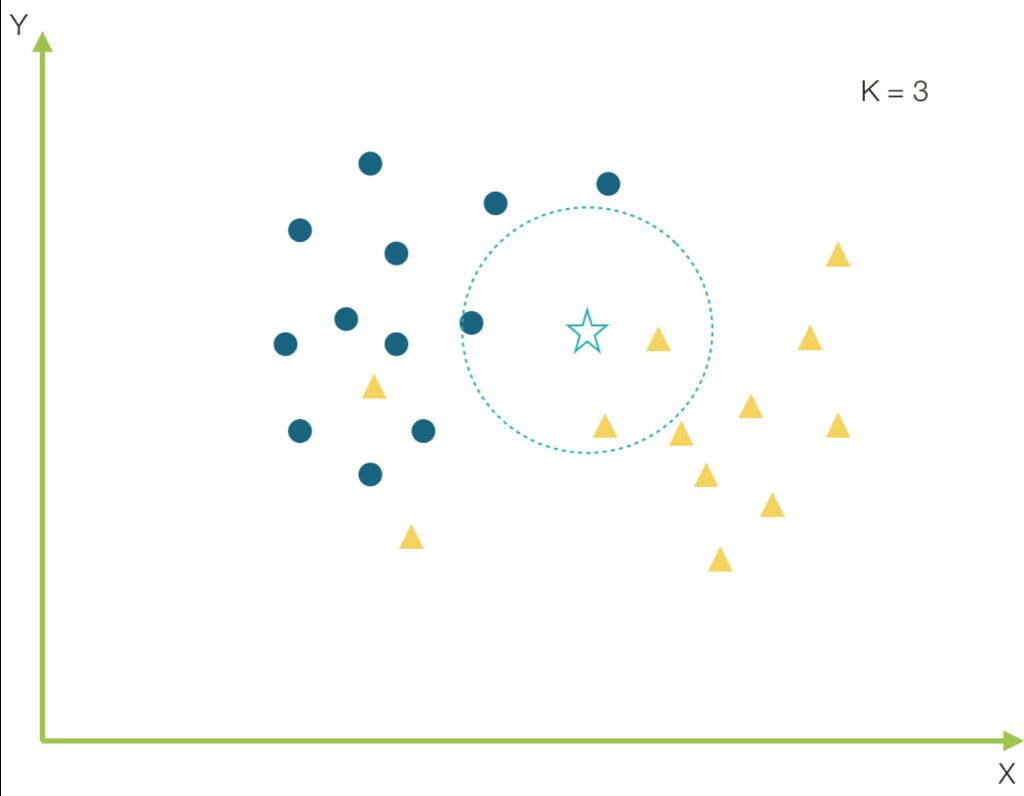

Supongamos que Z es el punto el cual se necesita predecir. Primero, se encuentra el punto K más cercano a Z y luego se clasifican los puntos para el voto mayoritario de sus vecinos K. Cada objeto vota por su clase y la clase con más votos se toma como la predicción. Para encontrar los puntos similares más cercanos, se encuentra la distancia entre puntos utilizando medidas de distancias.

Una opción popular es la distancia euclidiana, pero también hay otras medidas que pueden ser más adecuadas para un entorno dado e incluyen la distancia de Mahattan y Minkowski.

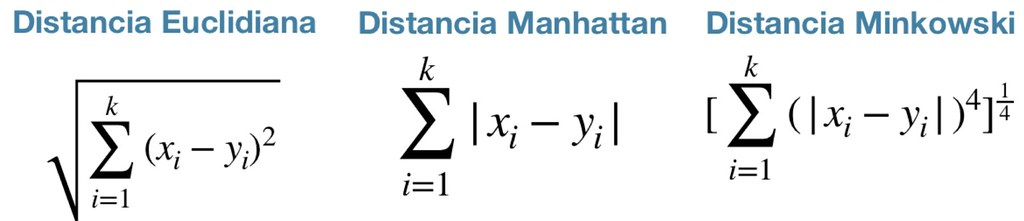

En resumen, KNN tiene los siguientes pasos básicos:

* Calcular la distancia
* Encontrar sus vecinos más cercanos
* Votar por las etiquetas



#### 1. Cargar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

#### 2. Cargar datos

* Mostrar los primeros cinco registros
* Mostrar los ultimos cinco registros

In [2]:
dataset = datasets.load_breast_cancer() 

dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe['class'] = pd.Series(dataset.target)
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
dataframe.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


#### 3. Limpieza de los datos
En este conjunto de datos no se presentan datos nulos o irregularidades en los datos, sin embargo según la lectura de otros casos de ejemplo para este mismo conjunto de datos se nos menciona que no todas las variables son relevantes por esa razón el dataframe se eliminarán las columnas que no son necesarias.

In [4]:
dataframe = dataframe.drop(dataframe.iloc[:,10:30],axis=1)
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


#### 4. Descripción de los datos
La variable dependiente es la llamada class y puede tener los siguientes valores
* 0 - Tumor Maligno
* 1 - Tumor Benigno

Las variables independientes son las siguientes:
* mean radius - Media de las distancias desde el centro hasta los puntos del perimetro
* mean texture - Desviación estandar de los valores de la escala de grises
* mean perimeter - Perimetro del tumor
* mean area - Area del tumor
* mean smoothness - Variaciones en la longitud del radio
* mean concavity - Medida calculada  por medio de la formula perimetro^2/area - 1.0
* mean concave points - Severidad de las porciones concavas del contorno
* mean symmetry - Simetria 
* mean fractal dimension - Aproximación a la costa (Zona sin tumor)

In [5]:
dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


* ¿Cuál es la cantidad de registros de clase 0 y 1?

In [6]:
print(dataframe.groupby('class').size())

class
0    212
1    357
dtype: int64


#### 5. Visualización de los datos
Se crea una gráfica de dispersión por cada par de variables y se indica su clase para facilitar encontrar patrones en los datos.

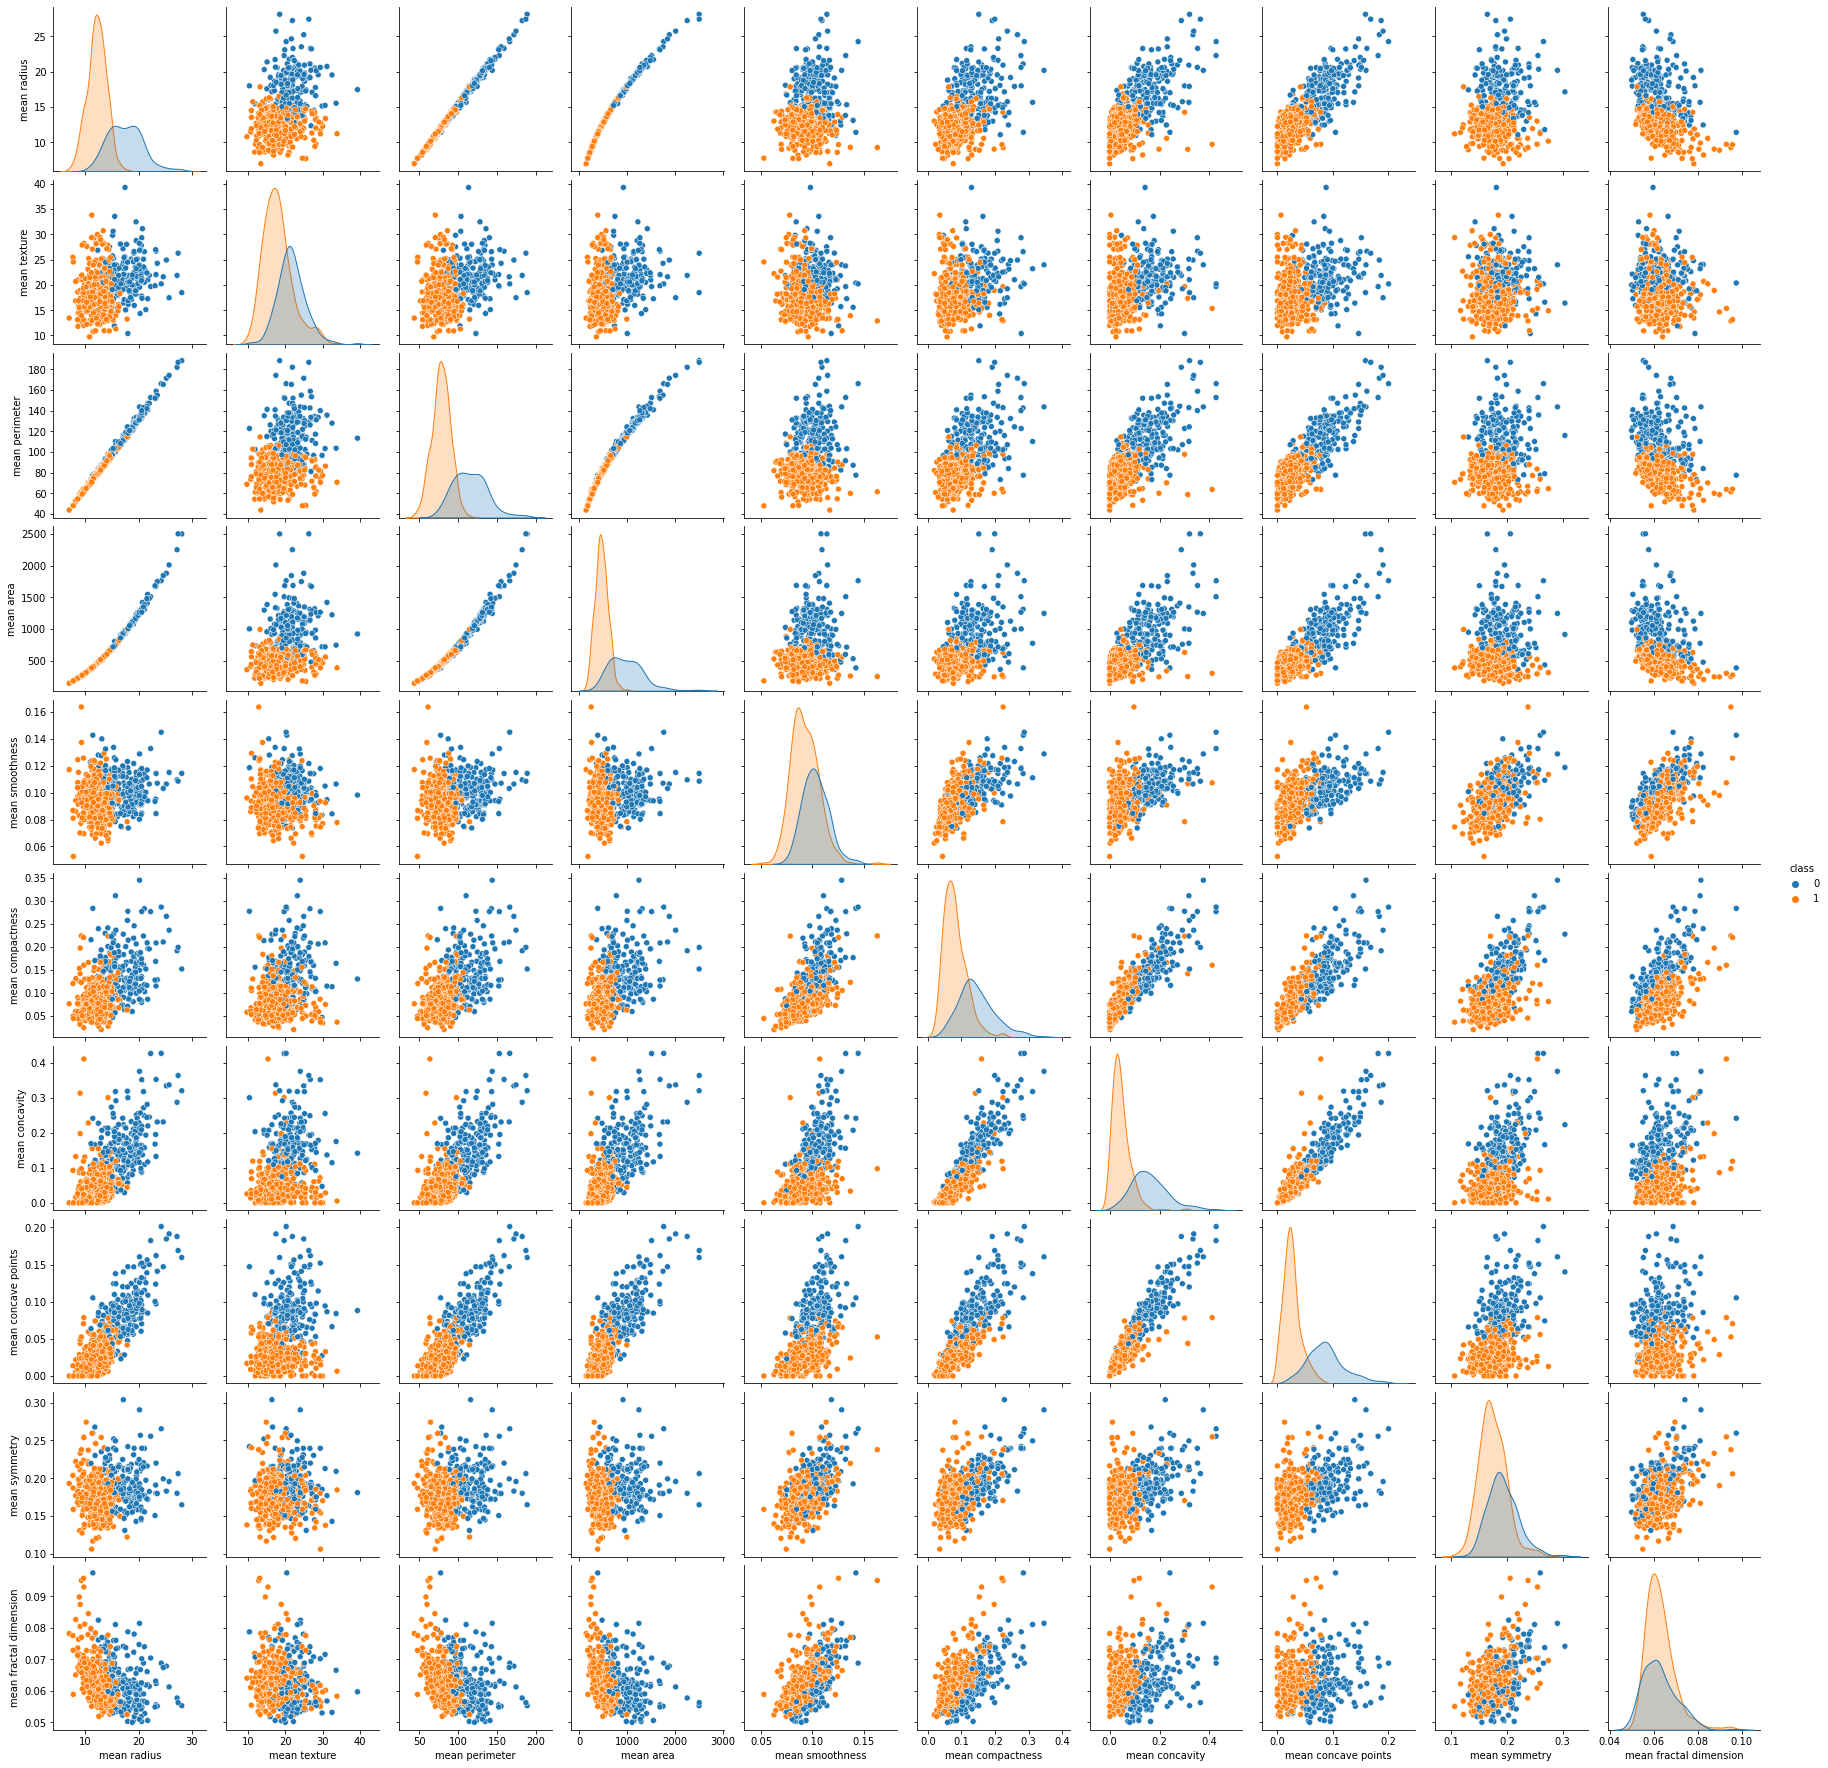

In [7]:
sns.pairplot(dataframe, hue='class')
plt.show()

#### 6. Datos de entrenamiento y validación

In [8]:
X = np.array(dataframe.drop(['class'],1))
Y = np.array(dataframe['class'])
X.shape

(569, 10)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

#### 7. Creación del modelo

In [10]:
modelo = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
modelo.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

* Predicciones

In [11]:
predicciones= modelo.predict(X_test)

dataframePred = pd.DataFrame({"Valor actual":y_test, "Predicciones":predicciones})

dataframePred

,Valor actual,Predicciones
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
109,1,1
110,1,1
111,1,1
112,0,0


#### 8. Evaluación y validación del modelo

##### Matriz de confusión

In [12]:
matriz = confusion_matrix(y_test, predicciones)
print("Matriz de Confusión:")
print(matriz)

Matriz de Confusión:
[[33  7]
 [ 4 70]]


##### Precisión del modelo

In [13]:
print("Precisión del modelo: ", metrics.accuracy_score(y_test, predicciones))

Precisión del modelo:  0.9035087719298246


##### Reporte de clasificación

In [14]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        40
           1       0.91      0.95      0.93        74

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



#### 9. Interpretación


En este caso se usa el modelo de Vecino par cercano para clasificar con el conjunto de datos de pacientes con tumores en la mama y en base a ciertas características saber si este es un tumor maligno o benigno (Este conjunto de datos ya había sido utilizado en el caso que se realizó un modelo de regresión logistica). Para este caso al igual que en el caso en el que se aplicó regresión logística se usa la variable class como variable dependiente la cual identifica si un tumor es benigno o maligno por medio de 0s y 1s si es 0 es un tumor Maligno y en caso de ser 1 es un tumor Benigno y las variables independientes son:

* mean radius - Media de las distancias desde el centro hasta los puntos del perimetro
* mean texture - Desviación estandar de los valores de la escala de grises
* mean perimeter - Perimetro del tumor
* mean area - Area del tumor
* mean smoothness - Variaciones en la longitud del radio
* mean concavity - Medida calculada por medio de la formula perimetro^2/area - 1.0
* mean concave points - Severidad de las porciones concavas del contorno
* mean symmetry - Simetria 
* mean fractal dimension - Aproximación a la costa (Zona sin tumor)

Dentro del modelo se hizo que el valor de K (numero de vecinos fuera en un total de 5 vecinos (k) con la métrica de minkowski y con un valor en p en 2 para poder empezar a evaluar el desempeño del modelo.
Al evaluar el modelo con la matriz de confusión y con el reporte de clasificación podemos ver que la precisión en acertar si es un tumor benigno es mayor que la precisión en acertar si es un tumor maligno siendo estas del 89% y del 91% respectivamente. Y teniendo en general el modelo una exactitud del 90% siendo esta muy buena. Y en cuanto a las demás estadísticas del modelo están relacionadas con la sensibilidad estas llegan a ser de un 90%, dando como conclusión que el vecino par cercano es un muy buen modelo para este conjunto de datos.
Sin embargo como vimos en el caso en donde se aplicó regresión logística este obtuvo mejores resultados en sus predicciones y en general el modelo fue más adecuado, lo que podría mejorar este modelo quizás pudiera ser trabajar con un numero mayor de vecinos o bien incluir todas las variables que tiene este conjunto de datos incluyendo las que son descartadas por algunos médicos.


#### 10. Bibliografía

* Lectura del caso

    Aprendie IA. (Desconocido). *K Vecinos más Cercanos – Práctica con Python*. 17 de diciembre de 2020, Sitio web: https://aprendeia.com/k-vecinos-mas-cercanos-programa-con-python-machine-learning/


* Descripción del algoritmo

    Aprendie IA. (Desconocido). *K Vecinos más Cercanos – Teoría*. 17 de diciembre de 2020, Sitio web: https://aprendeia.com/k-vecinos-mas-cercanos-teoria-machine-learning/